In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import matplotlib as mpl

mpl.rcParams.update({"axes.grid": True, "grid.color": "grey"})

In [ ]:
def reconstruct_matrix(u, s, v, k=None):
    # if k is not given, set k to the number of singular values
    if not k:
        k = s.shape[0]
    else:
        # if k is given, make sure it is not larger than the number of singular values
        k = min(k, s.shape[0])
        # truncate the u, s and v matrices
        u = u[:, :k]
        s = s[:k]
        v = v[:k, :]

    # initialize an empty matrix with the same size as the original matrix
    reconstructed = np.zeros((u.shape[0], v.shape[1]))
    # loop over the number of singular values
    for k in range(k):
        # reconstruct the matrix by summing the outer products of u and v times the singular values
        reconstructed += s[k] * np.outer(u[:, k], v[k, :])
    return reconstructed


def get_krank_approximation(a, k_rank=None):
    u, s, v = np.linalg.svd(a, full_matrices=True)
    return reconstruct_matrix(u, s, v, k_rank)


def check_reconstruction(a):
    np.allclose(a, get_krank_approximation(a))


def reconstruct_matrix_generator(u, s, v, k=None):
    # if k is not given, set k to the number of singular values
    if not k:
        k = s.shape[0]
    else:
        # if k is given, make sure it is not larger than the number of singular values
        k = min(k, s.shape[0])
        # truncate the u, s and v matrices
        u = u[:, :k]
        s = s[:k]
        v = v[:k, :]

    # initialize an empty matrix with the same size as the original matrix
    reconstructed = np.zeros((u.shape[0], v.shape[1]))
    # loop over the number of singular values
    for k in range(k):
        # reconstruct the matrix by summing the outer products of u and v times the singular values
        reconstructed += s[k] * np.outer(u[:, k], v[k, :])
        yield reconstructed

In [ ]:
B = np.array(
    [
        [3, 2, 5, 1, 0, 2, 4, 3, 1, 0],
        [0, 1, 3, 4, 1, 2, 0, 0, 2, 4],
        [2, 1, 3, 4, 2, 5, 0, 0, 3, 0],
        [0, 4, 2, 3, 7, 0, 2, 5, 2, 1],
        [3, 0, 0, 2, 4, 1, 0, 3, 1, 0],
        [2, 0, 0, 0, 5, 2, 0, 2, 0, 4],
        [3, 4, 0, 2, 0, 0, 2, 4, 5, 0],
        [2, 5, 0, 0, 3, 2, 5, 0, 0, 0],
        [3, 1, 3, 4, 0, 0, 0, 0, 3, 2],
        [0, 0, 0, 3, 4, 0, 0, 2, 3, 0],
        [3, 0, 0, 4, 0, 5, 2, 0, 0, 1],
        [2, 2, 0, 3, 0, 4, 0, 0, 2, 3],
    ]
)



errors = []
ranks = list(range(1, 11))

for k in ranks:
    # Compute SVD-based low-rank approximation
    B_k = get_krank_approximation(B, k_rank=k)
    # Calculate reconstruction error for different matrix metrics
    frob_error = np.linalg.norm(B - B_k, ord="fro")
    # Append errors to list
    errors.append(frob_error)

# Step 4: Plot reconstruction errors for each matrix metric
metrics = ["Frobenius norm"]

plt.plot(ranks, errors)
plt.xlabel("Rank")
plt.ylabel(metrics[0])
plt.tight_layout()
plt.show()

###########################################

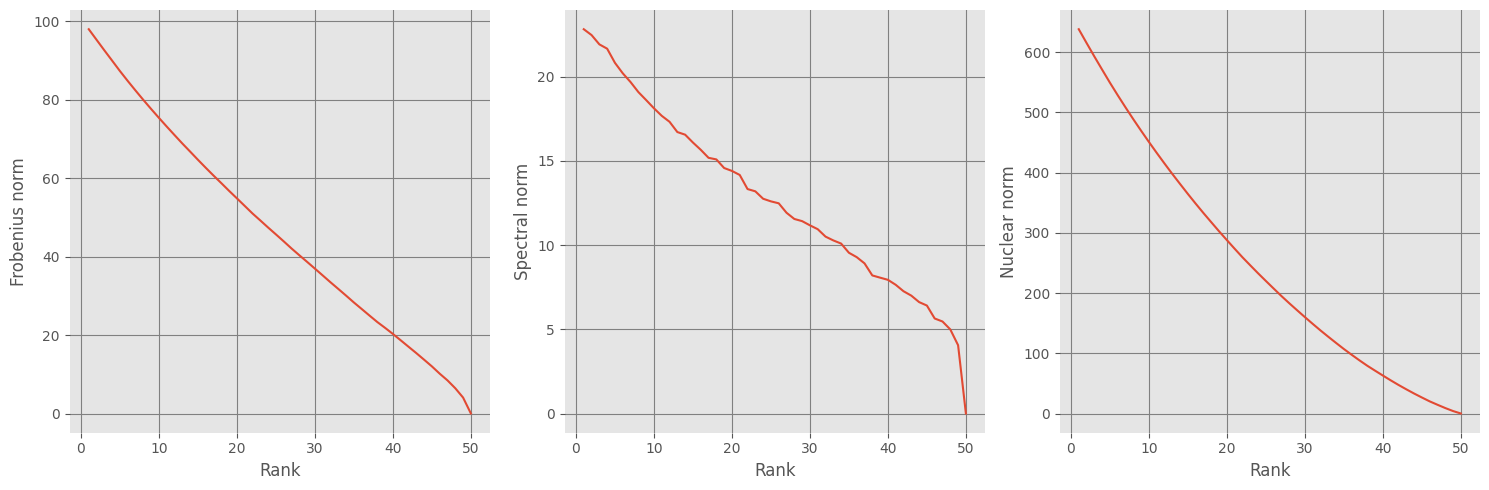

In [ ]:
# Step 1: Create matrix A with some known ratings
m = 100
n = 50
A = np.random.randint(1, 6, size=(m, n))

# Step 2: Choose a range of ranks to test
max_rank = min(m, n)
ranks = np.arange(1, max_rank + 1)

# Step 3: Compute low-rank approximations for each rank
errors = []
for k in ranks:
    # Compute SVD-based low-rank approximation
    A_k = get_krank_approximation(A, k_rank=k)

    # Calculate reconstruction error for different matrix metrics
    frob_error = np.linalg.norm(A - A_k, ord="fro")
    spec_error = np.linalg.norm(A - A_k, ord=2)
    nuclear_error = np.linalg.norm(A - A_k, ord="nuc")

    # Append errors to list
    errors.append((frob_error, spec_error, nuclear_error))

# Step 4: Plot reconstruction errors for each matrix metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()
metrics = ["Frobenius norm", "Spectral norm", "Nuclear norm"]
for i in range(len(errors[0])):
    axs[i].plot(ranks, [e[i] for e in errors])
    axs[i].set_xlabel("Rank")
    axs[i].set_ylabel(metrics[i])
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["left"].set_visible(False)
    axs[i].spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

In [119]:
# This code creates a random matrix A, of size m x n, where m and n are random integers between 2 and 5
# In case it's not correct, that is, the reconstructed matrix is not equal to the original print a message.
for i in range(100):
    m = np.random.randint(2, 6)
    n = np.random.randint(2, 6)
    A = np.random.randint(1, 6, size=(m, n))
    if not np.allclose(A, get_krank_approximation(A)):
        print("Reconstruction is not correct!")

In [ ]:
# Read ratings.csv using numpy
ratings = np.genfromtxt(
    "data/ratings.csv",
    delimiter=",",
    skip_header=1,
    dtype=[("userId", "i4"), ("movieId", "i4"), ("rating", "f4"), ("timestamp", "i4")],
)

In [4]:
# userId | movieId | rating | timestamp

In [ ]:
# Let's build a matrix m x n, where m is the number of movies and
# n is the number of users
n_users = np.unique(ratings["userId"]).shape[0]
n_movies = np.unique(ratings["movieId"]).shape[0]
# Create dictionary that maps the movieId to the row index
movieId_to_row = {movieId: i for i, movieId in enumerate(np.unique(ratings["movieId"]))}
row_to_movieId = {i: movieId for movieId, i in movieId_to_row.items()}
# Create dictionary that maps the userId to the column index
userId_to_col = {userId: i for i, userId in enumerate(np.unique(ratings["userId"]))}
col_to_userId = {i: userId for userId, i in userId_to_col.items()}
# Let's fix the seed for reproducibility
np.random.seed(42)
# Using numpy let's shuffle the ratings and split them into train and test sets (90% and 10%)
np.random.shuffle(ratings)
train = ratings[: int(ratings.shape[0] * 0.9)]
test = ratings[int(ratings.shape[0] * 0.9) :]

In [ ]:
# Let's create a function that given M and U return the error in the train and test sets
def get_both_errors(M, U):
    def get_error(M, U, ratings):
        error = 0
        for row in ratings:
            i, j, r = (
                movieId_to_row[row["movieId"]],
                userId_to_col[row["userId"]],
                row["rating"],
            )
            error += pow(r - np.dot(M[i, :], U[j, :]), 2)
        return error / ratings.shape[0]

    return get_error(M, U, train), get_error(M, U, test)

In [ ]:
X_train = []
for row in train:
    X_train.append(
        [movieId_to_row[row["movieId"]], userId_to_col[row["userId"]], row["rating"]]
    )

In [ ]:
X_test = []
for row in test:
    X_test.append(
        [movieId_to_row[row["movieId"]], userId_to_col[row["userId"]], row["rating"]]
    )

In [ ]:
# Create rating matrix with integer values
R = np.zeros((n_movies, n_users), dtype=float)
for row in train:
    R[movieId_to_row[row["movieId"]], userId_to_col[row["userId"]]] = row["rating"]

In [ ]:
def SVD_error(rk, dataset):
    def get_error(rk, dataset):
        error = 0
        for row in dataset:
            row_idx = movieId_to_row[row["movieId"]]
            col_idx = userId_to_col[row["userId"]]
            error += (row["rating"] - rk[row_idx, col_idx]) ** 2
        return error / dataset.shape[0]

    return get_error(rk, train), get_error(rk, test)

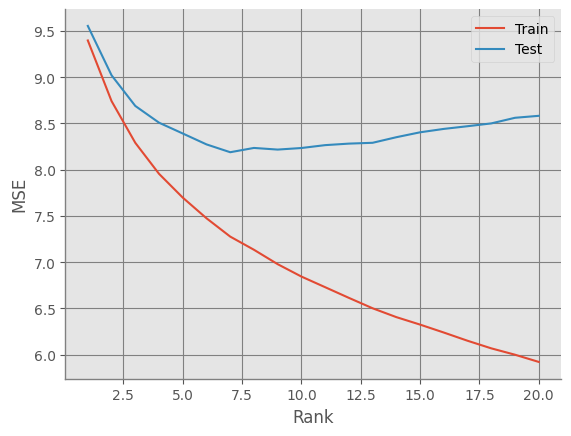

In [ ]:
# Let's try to find the best k using the test set
errors_train, errors_test = [], []
max_rank = min(n_movies, n_users, 20)
ranks = np.arange(1, max_rank + 1, 1)
u, s, v = np.linalg.svd(R, full_matrices=True)
R_k = reconstruct_matrix_generator(u, s, v, k=ranks[-1])
for c, rk in enumerate(R_k):
    err_train, err_test = SVD_error(rk, test)
    errors_train.append(err_train)
    errors_test.append(err_test)
# Plot reconstruction errors for each matrix metric
plt.plot(ranks, errors_train, label="Train")
plt.plot(ranks, errors_test, label="Test")
plt.legend()
plt.xlabel("Rank")
plt.ylabel("MSE")
# Remove the frame around the plot
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey

# Save plot with high quality as svg with tight layout
# plt.savefig('plots/svd_error.svg', format='svg', dpi=1200, bbox_inches='tight', transparent=True)

In [65]:
# Let's now create an R matrix with the average rating for each movie
R_avg = np.zeros((n_movies, n_users), dtype=float)
# With matrix R, each element that is < 0.001 in R is set to the mean of the corresponding column
for i in range(n_movies):
    for j in range(n_users):
        if R[i, j] < 0.001:
            R_avg[i, j] = np.mean(R[i, :])
        else:
            R_avg[i, j] = R[i, j]

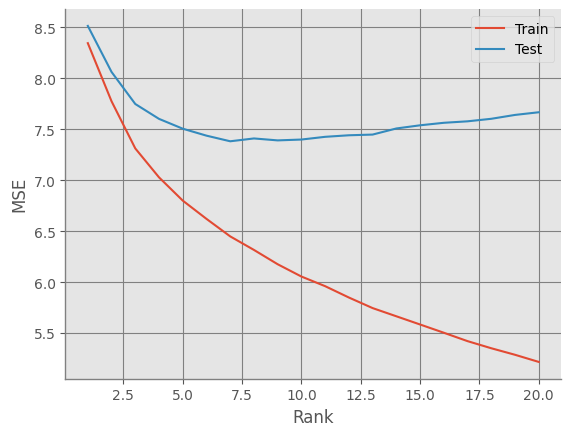

In [ ]:
# Let's try to find the best k using the test set
errors_train, errors_test = [], []
max_rank = min(n_movies, n_users, 20)
ranks = np.arange(1, max_rank + 1, 1)
u, s, v = np.linalg.svd(R_avg, full_matrices=True)
R_k = reconstruct_matrix_generator(u, s, v, k=ranks[-1])
for c, rk in enumerate(R_k):
    err_train, err_test = SVD_error(rk, test)
    errors_train.append(err_train)
    errors_test.append(err_test)
# Plot reconstruction errors for each matrix metric
plt.plot(ranks, errors_train, label="Train")
plt.plot(ranks, errors_test, label="Test")
plt.legend()
plt.xlabel("Rank")
plt.ylabel("MSE")
# Remove the frame around the plot
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey

# Save plot with high quality as svg with tight layout
# plt.savefig('plots/svd_error_with_mean.svg', format='svg', dpi=1200, bbox_inches='tight', transparent=True)

<h1>SGD

In [ ]:
def sgd_method(k, ld, lr, epochs):
    q = np.random.rand(n_movies, k)
    p = np.random.rand(n_users, k)
    errors_training = []
    errors_test = []
    for _ in range(epochs):
        # print('Epoch: %d' % ep)
        for i, j, r in X_train:
            # Calculate the error
            qi, pj = q[i], p[j]

            eij = r - np.dot(qi, pj)
            # Update q and p
            q[i] = qi + lr * (eij * pj - ld * qi)
            p[j] = pj + lr * (eij * qi - ld * pj)
            # Non negativity constraint
        q = np.maximum(q, 0)
        p = np.maximum(p, 0)
        err1, err2 = get_both_errors(q, p)
        errors_training.append(err1)
        errors_test.append(err2)
    return q, p, errors_training, errors_test

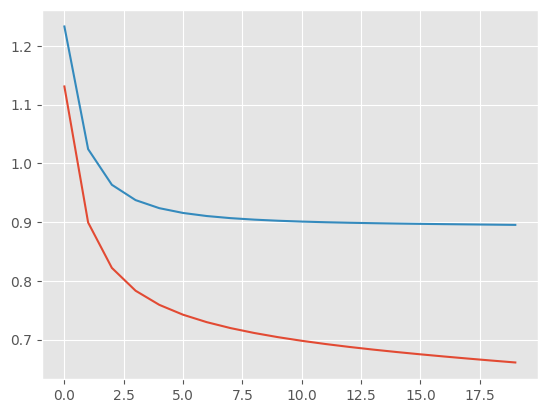

In [ ]:
_, _, errors_training, errors_test = sgd_method(4, 0.15, 0.01, 20)
plt.plot(errors_training, label="Training")
plt.plot(errors_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")

<h3> SGD with biases

In [ ]:
def sgd_method_with_biases(k, ld, lr, epochs):
    q = np.random.rand(n_movies, k)
    p = np.random.rand(n_users, k)
    bu = np.random.rand(n_users)
    bi = np.random.rand(n_movies)
    errors_training = []
    errors_test = []
    for ep in range(epochs):
        # print(ep)
        for i, j, r in X_train:
            # Calculate the error
            qi, pj = q[i], p[j]
            b_u, b_i = bu[j], bi[i]

            eij = r - (np.dot(qi, pj) + b_u + b_i)
            # Update q and p
            q[i] = qi + lr * (eij * pj - ld * qi)
            p[j] = pj + lr * (eij * qi - ld * pj)
            # Update user and movie biases
            bu[j] = b_u + lr * (eij - ld * b_u)
            bi[i] = b_i + lr * (eij - ld * b_i)
        # Non negativity constraint
        q = np.maximum(q, 0)
        p = np.maximum(p, 0)

        err1 = 0
        for row in X_train:
            i, j, r = row
            pred = q[i] @ p[j].T + bi[i] + bu[j]
            err1 += pow(r - pred, 2)
        err1 /= len(X_train)
        # print(err1)
        err2 = 0
        for row in X_test:
            i, j, r = row
            pred = q[i] @ p[j].T + bi[i] + bu[j]
            err2 += pow(r - pred, 2)
        err2 /= len(X_test)
        # print(err2)

        errors_training.append(err1)
        errors_test.append(err2)
    return q, p, bu, bi, errors_training, errors_test

In [ ]:
# Let's search for the best lambda and learning rate
_, _, _, _, errors_training, errors_test = sgd_method_with_biases(12, 0.15, 0.01, 30)

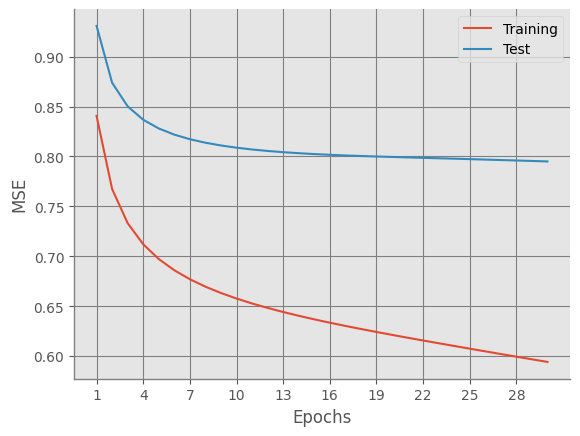

In [ ]:
plt.plot(range(1, 31), errors_training, label="Training")
plt.plot(range(1, 31), errors_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.xticks(np.arange(1, 31, 3))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")
# Save as pdf
plt.savefig(
    "plots/sgd_error_best_k.pdf", format="pdf", bbox_inches="tight", transparent=True
)
plt.show()

In [ ]:
err_train_per_k = []
err_test_per_k = []
for k in range(1, 20):
    print(k)
    _, _, _, _, errors_training, errors_test = sgd_method_with_biases(k, 0.15, 0.01, 20)
    err_train_per_k.append(errors_training[-1])
    err_test_per_k.append(errors_test[-1])

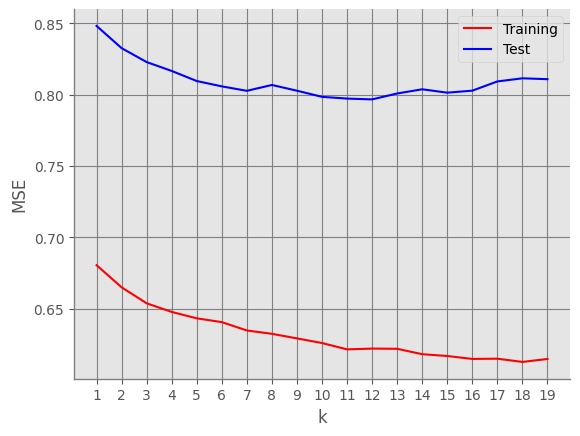

In [ ]:
plt.plot(range(1, 20), err_train_per_k, label="Training", color="red")
plt.plot(range(1, 20), err_test_per_k, label="Test", color="blue")
plt.legend()
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(np.arange(1, 20, 1))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")
# Save as pdf
plt.savefig(
    "plots/sgd_error_per_k.pdf", format="pdf", bbox_inches="tight", transparent=True
)
plt.show()

<h1> Multiplicative Rule Update NMF - Lee and Seung 1999

In [ ]:
ratings_ = np.array([[r[0], r[1], r[2]] for r in X_train]).astype(int)
# err_train_per_k = [] # To get the error per k just do a for loop over k's
# err_test_per_k = [] # and append the error to these lists

K = 2
P = np.random.rand(n_movies, K)
Q = np.random.rand(n_users, K)
lambda_ = 0.01

err_train = []
err_test = []

err1, err2 = get_both_errors(P, Q)
err_train.append(err1)
err_test.append(err2)


for epoch in range(1, 2):
    print("\tEpoch: %d" % (epoch))
    for c, row in enumerate(X_train):
        if c % 10000 == 0:
            print("\t\t", c, "/", len(X_train))
        u, i, r = row

        # Only where there is a rating
        I = ratings_[ratings_[:, 0] == u][:, [1, 2]]
        U = ratings_[ratings_[:, 1] == i][:, [0, 2]]

        QI_T = Q[I[:, 0]].T

        num = P[u] * np.dot(QI_T, I[:, 1])
        dem = np.dot(QI_T, np.dot(P[u], QI_T)) + lambda_ * len(I) * P[u]

        P[u] = num / dem + 0.001  # To avoid division by zero

        PU_T = P[U[:, 0]].T

        num = Q[i] * np.dot(PU_T, U[:, 1])
        dem = np.dot(PU_T, np.dot(P[U[:, 0]], Q[i].T)) + lambda_ * len(U) * Q[i]
        Q[i] = num / dem + 0.001

    err1, err2 = get_both_errors(P, Q)
    err_train.append(err1)
    err_test.append(err2)
    # err_train_per_k.append(err_train[-1])
    # err_test_per_k.append(err_test[-1])

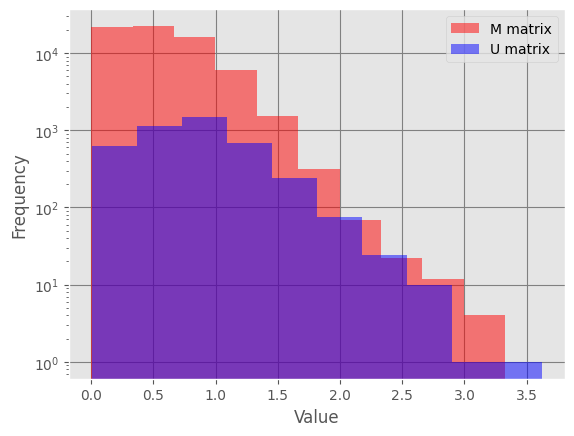

In [ ]:
# Plot an histogram of the factors of the matrix M and matrix U with different colors
plt.hist(P.flatten(), color="red", alpha=0.5, label="M matrix")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.hist(Q.flatten(), color="blue", alpha=0.5, label="U matrix")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")
# Put y with a log scale
plt.yscale("log")
# plt.savefig('plots/lee_hist.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

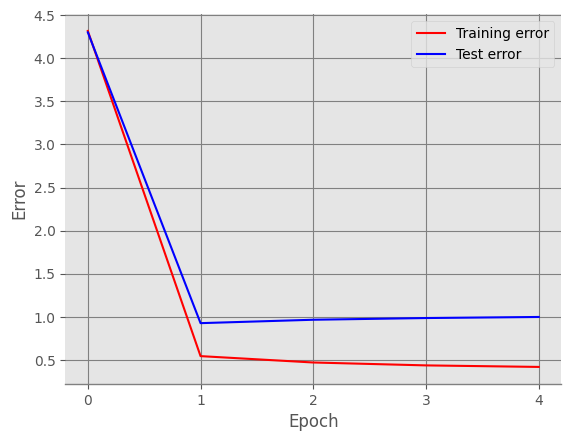

In [ ]:
plt.plot(err_train, label="Training error", color="red")
plt.plot(err_test, label="Test error", color="blue")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
# Select xticks as 0, 1, 2, 3 and 4
plt.xticks(np.arange(0, 5, 1))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_color('grey')
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey
# plt.savefig('plots/lee_error_best_k.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

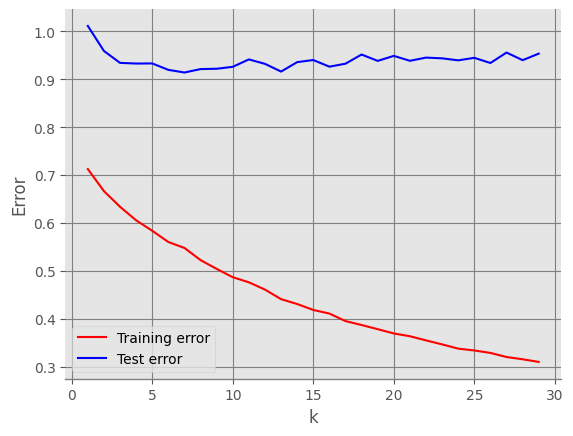

In [ ]:
# For this to work uncomment the line up there and do for loop on the k's
plt.plot(range(1, 30), err_train_per_k, label="Training error", color="red")
plt.plot(range(1, 30), err_test_per_k, label="Test error", color="blue")
plt.xlabel("k")
plt.ylabel("Error")
plt.legend()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_color('grey')
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey

# Save plot with high quality as svg with tight layout
# plt.savefig('plots/lee_error_per_k.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

In [109]:
np.count_nonzero(P < 0), np.count_nonzero(Q < 0)

(0, 0)

<h1> Non-negative ALS - Bro et al. </h1>

In [ ]:
def nnls(Z, x, P_initial=np.zeros(0, dtype=int)):
    """
    Find min_d ||x - Zd|| subject to d >= 0
    Some of the comments, such as "B2", refer directly to the steps of
    the fnnls algorithm as presented in the paper by Bro et al.
    Parameters
    ----------
    Z: NumPy array
        Z is an m x n matrix.
    x: Numpy array
        x is a m x 1 vector.
    P_initial: Numpy array, dtype=int
        By default, an empty array. An estimate for
        the indices of the support of the solution.

    Returns
    -------
    d: Numpy array
        d is a nx1 vector
    """

    # map Z, x, and P_initial to np arrays to standardize from any input
    Z, x, P_initial = map(
        np.asarray_chkfinite, (Z, x, P_initial)
    )  # not necessary, but good practice

    m, n = Z.shape
    # Calculating ZTZ and ZTx in advance to improve the efficiency of calculations
    ZTZ = Z.T.dot(Z)
    ZTx = Z.T.dot(x)

    # Declaring constants for tolerance and max repetitions
    epsilon = 2.2204e-16
    tolerance = epsilon * n

    # Number of contsecutive times the set P can remain unchanged loop until we terminate
    max_repetitions = 5

    # A1 + A2
    # P is a boolean array that represents the passive set
    P = np.zeros(n, dtype=bool)
    P[P_initial] = True

    # A3
    # Initialize d to zero vector
    d = np.zeros(n)

    # A4
    # Set w = Z^T*x - (Z^T*Z)d
    w = ZTx - (ZTZ) @ d

    # Initialize s
    s = np.zeros(n)

    # Count of amount of consecutive times set P has remained unchanged
    no_update = 0

    # Extra loop in case a support is set to update s and d
    if P_initial.shape[0] != 0:

        s[P] = np.linalg.solve((ZTZ)[P][:, P], (ZTx)[P])
        d = s.clip(min=0)

    # B1
    while (not np.all(P)) and np.max(w[~P]) > tolerance:

        current_P = (
            P.copy()
        )  # Make copy of passive set to check for change at end of loop

        # B2 + B3
        # Move the element in active set with largest value
        # of w into the passive set
        P[np.argmax(w * ~P)] = True

        # B4
        # Set s to the least squares solution along the passive set
        s[P] = np.linalg.solve((ZTZ)[P][:, P], (ZTx)[P])

        # C1
        # We loop until either the passive set is empty or every
        # element in s in the passive set is above the tolerance
        while np.any(P) and np.min(s[P]) <= tolerance:

            s, d, P = fix_constraint(ZTZ, ZTx, s, d, P, tolerance)

        # B5
        d = s.copy()
        # B6
        w = ZTx - (ZTZ) @ d

        # Check if there has been a change to the passive set
        if np.all(current_P == P):
            no_update += 1
        else:
            no_update = 0

        if no_update >= max_repetitions:
            break

    res = np.linalg.norm(x - Z @ d)  # Calculate residual loss ||x - Zd||

    return [d, res]


def fix_constraint(ZTZ, ZTx, s, d, P, tolerance):
    """
    The inner loop of the Fast Non-megative Least Squares Algorithm described
    in the paper "A fast non-negativity-constrained least squares algorithm"
    by Rasmus Bro and Sijmen De Jong.
    One iteration of the loop to adjust the new estimate s to satisfy the
    nonnegativity contraint of the solution.
    Some of the comments, such as "B2", refer directly to the steps of
    the fnnls algorithm as presented in the paper by Bro et al.
    Parameters
    ----------
    ZTZ: NumPy array
        ZTZ is an n x n matrix equal to Z.T * Z
    ZTx: Numpy array
        ZTx is an n x 1 vector equal to Z.T * x
    s: Numpy array
        The new estimate of the solution with possible
        negative values that do not meet the constraint
    d: Numpy array
        The previous estimate of the solution that satisfies
        the nonnegativity contraint
    P: Numpy array, dtype=np.bool
        The current passive set, which comtains the indices
        that are not fixed at the value zero.
    tolerance: float
        A tolerance, below which values are considered to be
        0, allowing for more reasonable convergence.

    Returns
    -------
    s: Numpy array
        The updated new estimate of the solution.
    d: Numpy array
        The updated previous estimate, now as close
        as possible to s while maintaining nonnegativity.
    P: Numpy array, dtype=np.bool
        The updated passive set
    """

    # C2
    # find largest alpha such that d + alpha(s-d)
    # is close to s but non-negative
    q = P * (s <= tolerance)
    alpha = np.min(d[q] / (d[q] - s[q]))

    # C3
    # Set d as close to s as possible while maintaining non-negativity
    d = d + alpha * (s - d)

    # C4
    # Move elements with d less than tolerance to active set
    P[d <= tolerance] = False

    # C5
    # Set s to the least squares solution along the passive set
    s[P] = np.linalg.solve((ZTZ)[P][:, P], (ZTx)[P])

    # C6
    # Set values of s in active set to 0.
    s[~P] = 0.0

    return s, d, P

In [ ]:
def als(R, K, reg, steps):
    """
    Alternating Least Squares algorithm for matrix factorization.

    Parameters:
    R: numpy array of shape (n_users, n_items)
        The rating matrix to be factorized, where R[i, j] is the rating given by user i to item j.
    K: int
        The number of latent factors to use.
    reg: float
        The regularization parameter.
    steps: int
        The number of iterations to run the algorithm for.

    Returns:
    U: numpy array of shape (n_users, K)
        The user latent matrix.
    M: numpy array of shape (n_items, K)
        The movie latent matrix.
    """
    n_items, n_users = R.shape

    # Initialize the user and movie latent matrices randomly
    U = np.abs(np.random.rand(n_users, K))
    M = np.abs(np.random.rand(n_items, K))

    # Compute the regularization terms
    reg_I = reg * np.eye(K)

    error_1 = []
    error_2 = []
    err1, err2 = get_both_errors(M, U)
    error_1.append(err1)
    error_2.append(err2)
    R_as_int = np.rint(R)
    mask_for_users = [R_as_int[:, j] != 0 for j in range(n_users)]
    mask_for_items = [R_as_int[i, :] != 0 for i in range(n_items)]

    # Run the algorithm for the specified number of iterations
    for ep in range(steps):
        # print('Epoch: %d' % (ep+1))
        # Update the movie latent matrix M
        for j in range(n_users):
            # Compute the relevant subset of the user latent matrix U
            Mj = M[mask_for_users[j]]
            Rj = R[mask_for_users[j], j]

            # Update M using the closed-form solution
            U[j] = nnls(np.dot(Mj.T, Mj) + reg_I, np.dot(Mj.T, Rj))[0]

        # Update the user latent matrix U
        for i in range(n_items):
            # Compute the relevant subset of the movie latent matrix M
            Ui = U[mask_for_items[i]]
            Ri = R[i, mask_for_items[i]]
            # Update U using the closed-form solution
            M[i] = nnls(np.dot(Ui.T, Ui) + reg_I, np.dot(Ui.T, Ri))[0]

        err1, err2 = get_both_errors(M, U)
        error_1.append(err1)
        error_2.append(err2)

    return U, M, error_1, error_2

In [211]:
U, M, err1, err2 = als(R, 2, 0.2, 4)

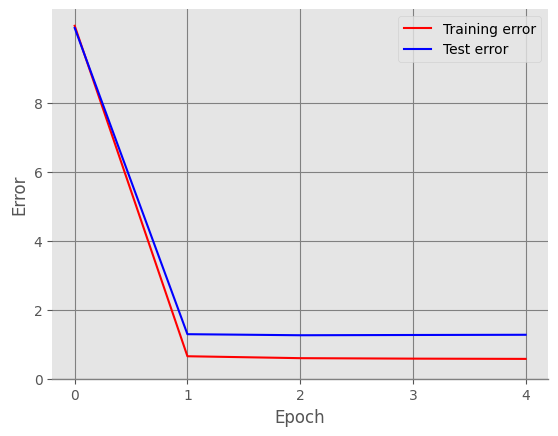

In [ ]:
plt.plot(err1, label="Training error", color="red")
plt.plot(err2, label="Test error", color="blue")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
# Select xticks as 0, 1, 2, 3 and 4
plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(0, 10, 2))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_color('grey')
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey
# plt.savefig('plots/als_error_best_k_big.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

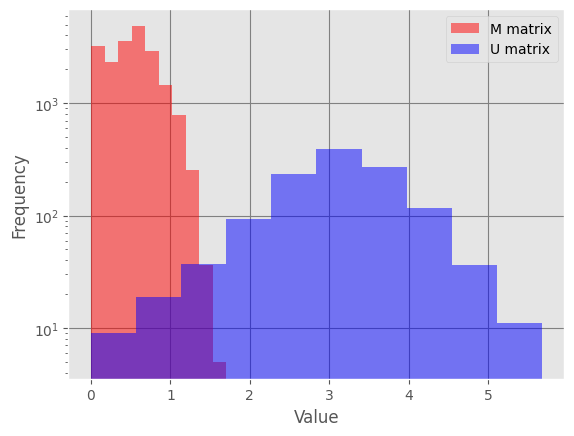

In [ ]:
# Plot an histogram of the factors of the matrix M and matrix U with different colors
plt.hist(M.flatten(), color="red", alpha=0.5, label="M matrix")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.hist(U.flatten(), color="blue", alpha=0.5, label="U matrix")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale("log")
# plt.savefig('plots/als_hist.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

In [ ]:
err_train_per_k = []
err_test_per_k = []
for k in range(1, 20):
    print(k)
    _, _, err1, err2 = als(R, k, 0.2, 1)
    err_train_per_k.append(err1[-1])
    err_test_per_k.append(err2[-1])

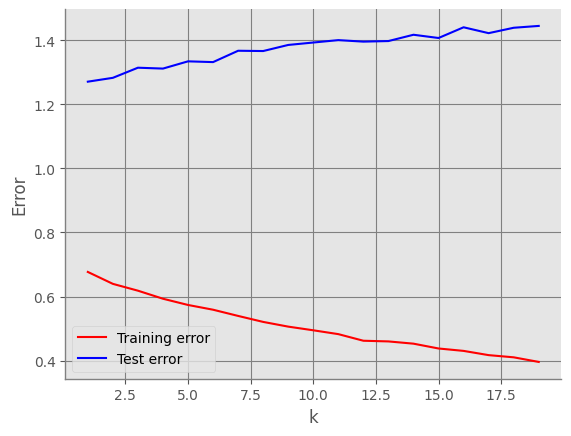

In [ ]:
plt.plot(range(1, 20), err_train_per_k, label="Training error", color="red")
plt.plot(range(1, 20), err_test_per_k, label="Test error", color="blue")
plt.legend()
plt.xlabel("k")
plt.ylabel("Error")
# Remove the frame around the plot
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")
# Set left frame to grey

# Save plot with high quality as svg with tight layout
# plt.savefig('plots/als_error_per_k.png', format='png', dpi=1200, bbox_inches='tight', transparent=True)

In [390]:
np.count_nonzero(M < 0), np.count_nonzero(U < 0)

(0, 0)

In [ ]:
M, U, err1, err2 = als(R, 2, 0.2, 4)